# 2023 Bar Chart

In [2]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read in 2023
clean_data1 =pd.read_csv("Boston Property Assesment Data2023.csv")

C:\Users\savan\AppData\Local\Temp\ipykernel_2500\201013184.py:1: DtypeWarning: Columns (44,53) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_data1 =pd.read_csv("Boston Property Assesment Data2023.csv")


In [5]:
#pull out useful columnns
useful_boston1 = clean_data1[['OWNER','CITY','OWN_OCC','TOTAL_VALUE','GROSS_TAX','YR_BUILT']]
useful_boston1

,OWNER,CITY,OWN_OCC,TOTAL_VALUE,GROSS_TAX,YR_BUILT
0,CIOTO ROBERT M,EAST BOSTON,Y,388100,4168.1972,1910.0
1,BUENROSTRO ROGELIO,EAST BOSTON,Y,530800,5700.7872,1900.0
2,MARSIGLIA MARILYN G,EAST BOSTON,Y,533600,5730.8672,1920.0
3,MELCHER JOHN ROB3RT,EAST BOSTON,Y,715400,7683.3972,1900.0
4,HUBBARD CHARLEY,EAST BOSTON,N,763900,8204.2900,1900.0
...,...,...,...,...,...,...
30438,SZABO KIMBERLY S,BRIGHTON,Y,755800,8117.2872,1920.0
30439,KAPILIAN RALPH H TS,BRIGHTON,Y,886800,9524.2272,1920.0
30440,RUFO GLORIA J,BRIGHTON,Y,1057800,11360.7672,1910.0
30441,HURWITCH SANDRA LEE,BRIGHTON,Y,844600,9071.0072,1920.0


In [7]:
#filter out those NOT owner occupied
owner_occ = useful_boston1[useful_boston1['OWN_OCC'] == 'Y']
owner_occ

,OWNER,CITY,OWN_OCC,TOTAL_VALUE,GROSS_TAX,YR_BUILT
0,CIOTO ROBERT M,EAST BOSTON,Y,388100,4168.1972,1910.0
1,BUENROSTRO ROGELIO,EAST BOSTON,Y,530800,5700.7872,1900.0
2,MARSIGLIA MARILYN G,EAST BOSTON,Y,533600,5730.8672,1920.0
3,MELCHER JOHN ROB3RT,EAST BOSTON,Y,715400,7683.3972,1900.0
5,YEE STEVEN,EAST BOSTON,Y,567000,6089.5772,1905.0
...,...,...,...,...,...,...
30438,SZABO KIMBERLY S,BRIGHTON,Y,755800,8117.2872,1920.0
30439,KAPILIAN RALPH H TS,BRIGHTON,Y,886800,9524.2272,1920.0
30440,RUFO GLORIA J,BRIGHTON,Y,1057800,11360.7672,1910.0
30441,HURWITCH SANDRA LEE,BRIGHTON,Y,844600,9071.0072,1920.0


In [8]:
#create bins
size_bins = [0, 249999, 499999, 749999, 999999, 1249999, 1499999, 1749999, 1999999, 2249999, 24999999, 1000000000]
group_names = ["Under 250k", "250k-500k", "500k-750k", "750k-1M", "1M-1.25M", "1.25M-1.5M", "1.5M-1.75M", "1.75M-2M", "2M-2.25M", "2.25M-2.5M", "Over 2.5M"]

In [9]:
owner_occ["Price Bins"] =  pd.cut(owner_occ["TOTAL_VALUE"], size_bins, labels=group_names)
owner_occ

C:\Users\savan\AppData\Local\Temp\ipykernel_2500\2789541579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_occ["Price Bins"] =  pd.cut(owner_occ["TOTAL_VALUE"], size_bins, labels=group_names)


,OWNER,CITY,OWN_OCC,TOTAL_VALUE,GROSS_TAX,YR_BUILT,Price Bins
0,CIOTO ROBERT M,EAST BOSTON,Y,388100,4168.1972,1910.0,250k-500k
1,BUENROSTRO ROGELIO,EAST BOSTON,Y,530800,5700.7872,1900.0,500k-750k
2,MARSIGLIA MARILYN G,EAST BOSTON,Y,533600,5730.8672,1920.0,500k-750k
3,MELCHER JOHN ROB3RT,EAST BOSTON,Y,715400,7683.3972,1900.0,500k-750k
5,YEE STEVEN,EAST BOSTON,Y,567000,6089.5772,1905.0,500k-750k
...,...,...,...,...,...,...,...
30438,SZABO KIMBERLY S,BRIGHTON,Y,755800,8117.2872,1920.0,750k-1M
30439,KAPILIAN RALPH H TS,BRIGHTON,Y,886800,9524.2272,1920.0,750k-1M
30440,RUFO GLORIA J,BRIGHTON,Y,1057800,11360.7672,1910.0,1M-1.25M
30441,HURWITCH SANDRA LEE,BRIGHTON,Y,844600,9071.0072,1920.0,750k-1M


In [10]:
#get an individual bin count
binned_prices = owner_occ.groupby(["Price Bins"]).count()["TOTAL_VALUE"]
binned_prices

Price Bins
Under 250k      111
250k-500k      6141
500k-750k     11375
750k-1M        4313
1M-1.25M       1658
1.25M-1.5M      650
1.5M-1.75M      274
1.75M-2M        161
2M-2.25M        133
2.25M-2.5M      593
Over 2.5M         1
Name: TOTAL_VALUE, dtype: int64

In [11]:
#find median home value
median = owner_occ['TOTAL_VALUE'].median()
median

print("The median home value in 2023 was $",median)

The median home value in 2023 was $ 621800.0


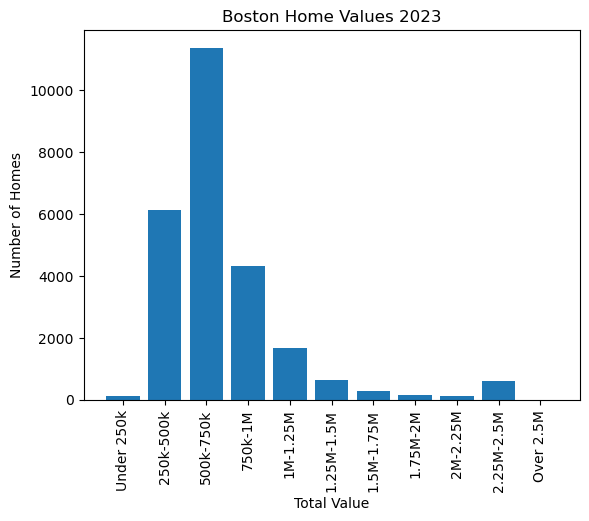

In [12]:
#Chart home values
x_axis = np.arange(len(group_names))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, binned_prices)
plt.xticks(tick_locations, group_names, rotation="vertical")
plt.xlabel("Total Value")
plt.ylabel("Number of Homes")
plt.title("Boston Home Values 2023")
plt.show()

<Figure size 1000x600 with 0 Axes>

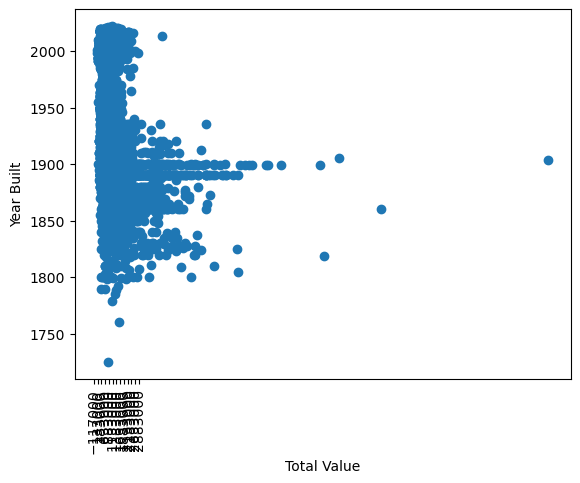

In [13]:
## plt.figure(figsize=(10,6))
##fig,ax=plt.subplots()    
## plt.scatter(owner_occ["TOTAL_VALUE"],owner_occ["YR_BUILT"])
## start,end=ax.get_xlim()
## ax.xaxis.set_ticks(np.arange(-117000, 3100000, 250000))
## plt.ticklabel_format(style="plain")
## plt.xticks(rotation="vertical")
## plt.xlabel('Total Value')
## plt.ylabel('Year Built')
## plt.show()

#cant get x ticks where i want them...